<a href="https://colab.research.google.com/github/rahulkumarvh/Drug-Information-Extraction/blob/main/Drug_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Drug Extraction**

### **Installing the Dependencies**

In [ ]:
!python -m pip install paddlepaddle-gpu==2.0.0 -i https://mirror.baidu.com/pypi/simple

In [ ]:
!pip install paddleocr

In [ ]:
!git clone https://github.com/PaddlePaddle/PaddleOCR

In [15]:
from paddleocr import PaddleOCR, draw_ocr
from matplotlib import pyplot as plt
import cv2
import os

### **Loading The Model**

In [ ]:
ocr_model = PaddleOCR(lang='en')

In [5]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [17]:
img_path = '/content/gdrive/MyDrive/TensorFlow/Drug Extraction/Drug1.jpg'

In [18]:
result = ocr_model.ocr(img_path)

[2021/12/05 14:09:57] root WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2021/12/05 14:10:04] root DEBUG: dt_boxes num : 20, elapse : 6.55717921257019
[2021/12/05 14:10:05] root DEBUG: rec_res num  : 20, elapse : 0.13045763969421387


In [19]:
result

[[[[64.0, 153.0], [249.0, 147.0], [250.0, 170.0], [65.0, 177.0]],
  ('Betahistine Tabletsl.P', 0.9325052)],
 [[[69.0, 179.0], [126.0, 179.0], [126.0, 195.0], [69.0, 195.0]],
  ('Vertin', 0.99728566)],
 [[[276.0, 189.0], [372.0, 189.0], [372.0, 202.0], [276.0, 202.0]],
  ('g.Lic.No.MNB/15/880', 0.92035234)],
 [[[68.0, 199.0], [116.0, 202.0], [115.0, 219.0], [67.0, 217.0]],
  ('8mg', 0.9994295)],
 [[[68.0, 224.0], [112.0, 224.0], [112.0, 239.0], [68.0, 239.0]],
  ('15 Tablets', 0.96287835)],
 [[[69.0, 243.0], [194.0, 243.0], [194.0, 256.0], [69.0, 256.0]],
  ('Eachuncoatedtabtet contair', 0.9381415)],
 [[[117.0, 259.0], [156.0, 259.0], [156.0, 265.0], [117.0, 265.0]],
  ('woc.cn', 0.6988359)],
 [[[72.0, 270.0], [113.0, 270.0], [113.0, 277.0], [72.0, 277.0]],
  ('xeipients', 0.7471682)],
 [[[69.0, 284.0], [231.0, 282.0], [231.0, 295.0], [69.0, 297.0]],
  ('DosageAdirectedbythePhysiiar', 0.90120703)],
 [[[73.0, 312.0], [185.0, 312.0], [185.0, 326.0], [73.0, 326.0]],
  ('25C.Protect from li

In [20]:
for res in result:
    print(res[1][0])

Betahistine Tabletsl.P
Vertin
g.Lic.No.MNB/15/880
8mg
15 Tablets
Eachuncoatedtabtet contair
woc.cn
xeipients
DosageAdirectedbythePhysiiar
25C.Protect from light.
to
Keepout of reachof chilaron
Abbott
SCHEDULEHDRUG-WARN
Betahistine TabletsI.P
Vertin
Lic.No.:MNB/15/88
8mg
d in IndQ by
15.Tablets


### **Result Visualization**

In [21]:
boxes = [res[0] for res in result] # 
texts = [res[1][0] for res in result]
scores = [res[1][1] for res in result]

In [22]:
font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')

In [23]:
img = cv2.imread(img_path) 

In [24]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

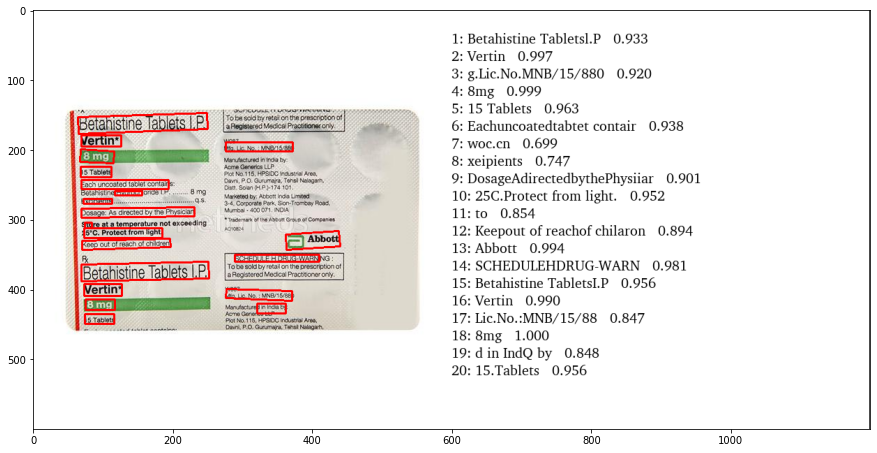

In [26]:
plt.figure(figsize=(15,15))
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path) 
plt.imshow(annotated) 

In [27]:
img.shape

(600, 600, 3)